In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

El análisis estadístico es un proceso de comprensión de cómo las variables en un conjunto de datos se relacionan entre sí y cómo esas relaciones dependen de otras variables. La visualización puede ser un componente central de este proceso porque, cuando los datos se visualizan correctamente, el sistema visual humano puede ver tendencias y patrones que indican una relación. Utilizaremos principalmente estos dos tipos de grafico:

    * relplot() combines a FacetGrid with one of two axes-level function
    * scatterplot() (with kind="scatter"; the default)
    * lineplot() (with kind="line") 

## 1. Relacionar variables con diagramas de dispersión

In [3]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


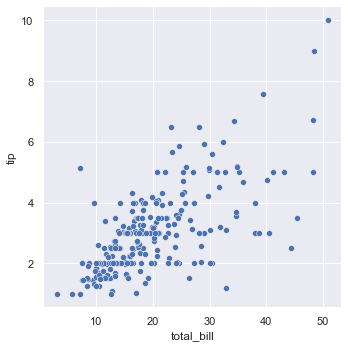

In [6]:
# The scatterplot() is the default kind in relplot() (it can also be forced by setting kind="scatter"
sns.relplot(data=tips, x="total_bill", y="tip");

### 1.1  Agregar otra dimensión con "hue" y una variable categorica

Si bien los puntos se trazan en dos dimensiones, **se puede agregar otra dimensión al gráfico coloreando los puntos de acuerdo con una tercera variable. En seaborn, esto se conoce como el uso de una “hue semantic”**, porque el color del punto gana significado:

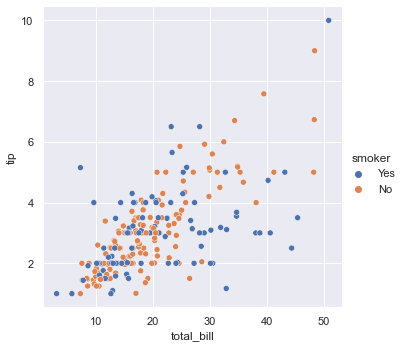

In [7]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="smoker");

### 1.2 Acentuar los cambios utilizando "style" y una variable categorica

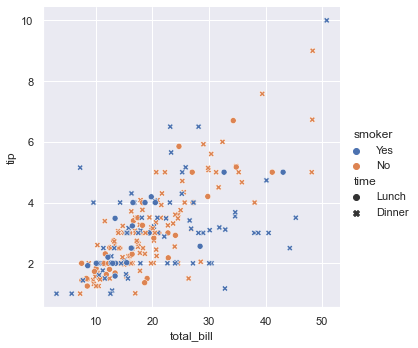

In [10]:
# Lo que hace "style" es definir un marcador diferente para cada categoria
sns.relplot(data=tips, x="total_bill", y="tip", 
            hue="smoker", style="time");

En los ejemplos anteriores, la semántica del matiz era categórica, por lo que se aplicó la paleta cualitativa predeterminada. **Si la semántica del tono es numérica (específicamente, si se puede convertir en flotante), la coloración predeterminada cambia a una paleta secuencial**.

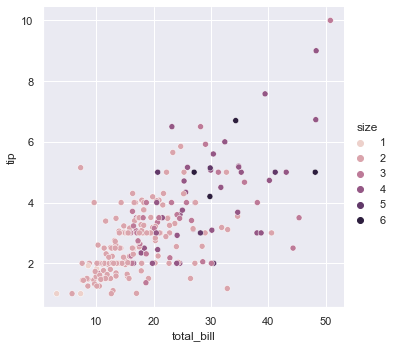

In [11]:
sns.relplot(data=tips, x="total_bill", y="tip", 
            hue="size");

En ambos casos, puedes personalizar la paleta de colores. Hay muchas opciones para hacerlo. Aquí, personalizamos una paleta secuencial usando la interfaz de cadenas para cubehelix_palette()

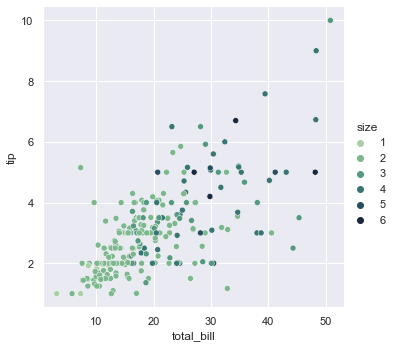

In [12]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip","dark:#5A9_r"
    hue="size", palette="ch:r=-.5,l=.75"
)

### 1.3 Cambiar el tamaño de los puntos, con el argumento "size"

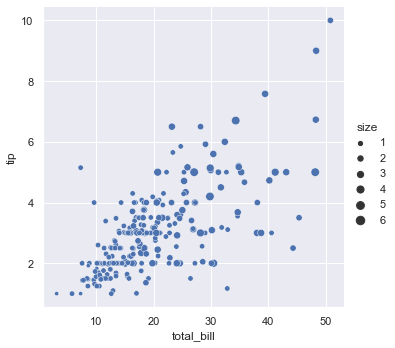

In [15]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip",
    size="size"
)

El tamaño de los puntos puede depender de la variable, y adicionalmente **podemos utilizar el argumento "sizes" para definir tamaños especificos**.

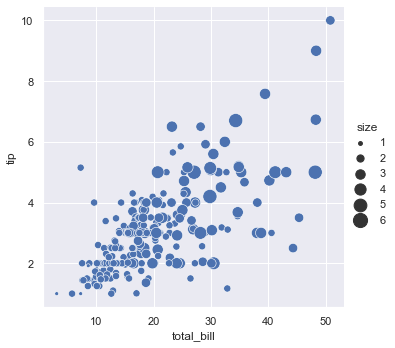

In [55]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip",
    size="size", sizes=(15,200),
    palette="dark:#5A9_r"
)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

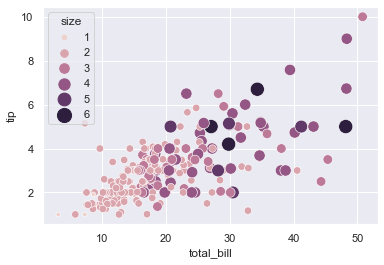

In [25]:
sns.scatterplot(
    data=tips, x="total_bill", y="tip", hue="size", size="size",
    sizes=(20, 200), legend="full"
)

## 2. Enfatizar la continuidad de las variables con graficos de línea

Con algunos conjuntos de datos, es posible que desee comprender los cambios en una variable como una función del tiempo o una variable continua similar. En esta situación, una buena opción es dibujar un gráfico de líneas.

    * lineplot() 
    * relplot() by setting kind="line"

In [34]:
dowjones = sns.load_dataset("dowjones")
dowjones = dowjones.iloc[1:100]
dowjones

,Date,Price
1,1915-01-01,56.55
2,1915-02-01,56.00
3,1915-03-01,58.30
4,1915-04-01,66.45
5,1915-05-01,65.95
...,...,...
95,1922-11-01,95.75
96,1922-12-01,97.00
97,1923-01-01,98.20
98,1923-02-01,100.80


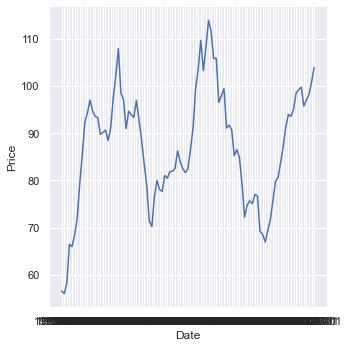

In [35]:
sns.relplot(data=dowjones, x="Date", y="Price", kind="line")

### 2.1 Agregación y representación de la incertidumbre

Los conjuntos de datos más complejos tendrán varias medidas para el mismo valor de la variable x. **El comportamiento predeterminado en seaborn es agregar las mediciones múltiples en cada valor de x trazando la media y el intervalo de confianza del 95 % alrededor de la media**

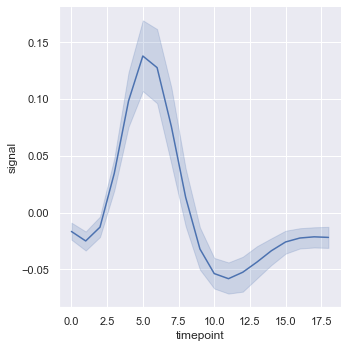

In [30]:
fmri = sns.load_dataset("fmri")
sns.relplot(data=fmri, x="timepoint", y="signal", kind="line")

Los intervalos de confianza se calculan mediante el arranque, que puede requerir mucho tiempo para conjuntos de datos más grandes. Por lo tanto, es posible deshabilitarlos.

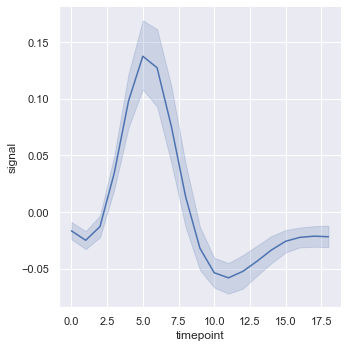

In [39]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal" #errorbar=None
)

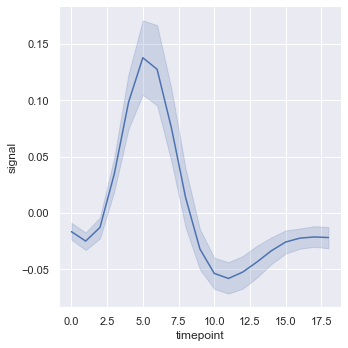

In [42]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", #error="sd",
)

**Para desactivar la agregación por completo, establezca el parámetro del estimador en None**. Esto podría producir un efecto extraño cuando los datos tienen múltiples observaciones en cada punto.

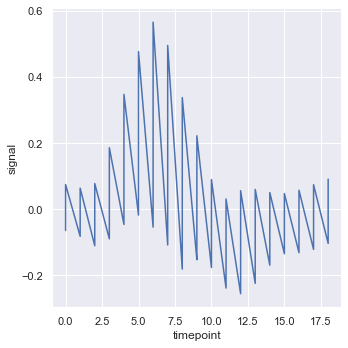

In [46]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal",
    estimator=None,
)

## 3. Graficar subconjuntos de datos con asignaciones semánticas (colores, marcadores, y variables cualitativas)

La función **lineplot() tiene la misma flexibilidad que scatterplot(): puede mostrar hasta tres variables adicionales modificando el tono, el tamaño y el estilo de los elementos del gráfico**. Lo hace usando la misma API que scatterplot(), lo que significa que no necesitamos detenernos y pensar en los parámetros que controlan el aspecto de las líneas frente a los puntos en matplotlib.

El uso de la semántica en lineplot() también determinará cómo se agregan los datos. Por ejemplo, **agregar una semántica de tono con dos niveles divide la gráfica en dos líneas y bandas de error**, coloreando cada una para indicar a qué subconjunto de datos corresponden.

### 3.1 Graficar dos líneas independientes

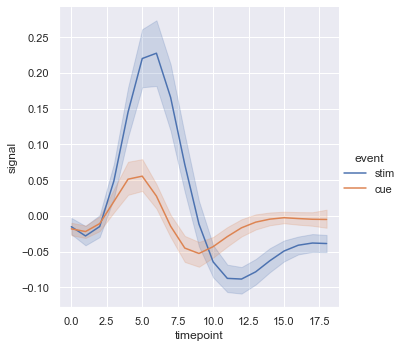

In [50]:
# Agregamos un "hue" para definir dos lineas independientes
sns.relplot(data=fmri, kind='line', 
            x="timepoint", y="signal",
           hue='event');

### 3.2 Agregar una categorización con "style"

Adding a style semantic to a line plot changes the pattern of dashes in the line by default **style**

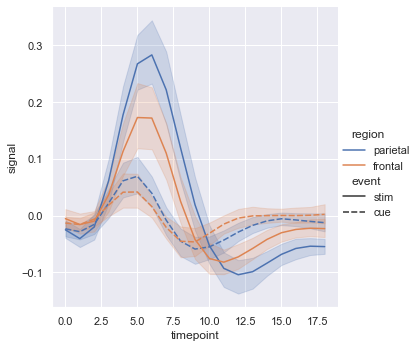

In [49]:
sns.relplot(data=fmri, kind='line', 
            x="timepoint", y="signal",
           hue='region', style='event')

### 3.3 Agregar marcadores a las líneas

**Puede identificar subconjuntos por los marcadores utilizados en cada observación**, ya sea junto con los guiones o en lugar de ellos **dashes=False, markers=True**. Por defecto la linea queda punteada, lo que hacemos desactivar el punteado, y activar los marcadores.

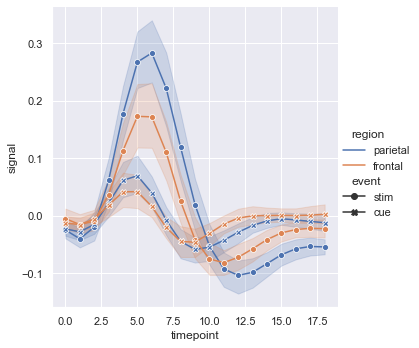

In [51]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="region", style="event",
    dashes=False, markers=True,
)

Cuando trabaja con datos de medidas repetidas (es decir, tiene unidades que se muestrearon varias veces), también puede trazar cada unidad de muestreo por separado sin distinguirlas a través de la semántica. Esto evita desordenar la leyenda.

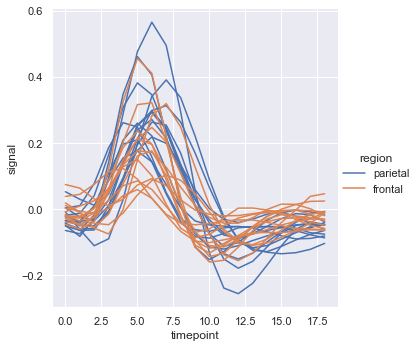

In [52]:
sns.relplot(
    data=fmri.query("event == 'stim'"), kind="line",
    x="timepoint", y="signal", hue="region",
    units="subject", estimator=None,
)

### 3.4 Colorear datos categóricos o numéricos

El mapa de colores predeterminado y el manejo de la leyenda en lineplot() también **depende de si la semántica del tono es categórica o numérica**.

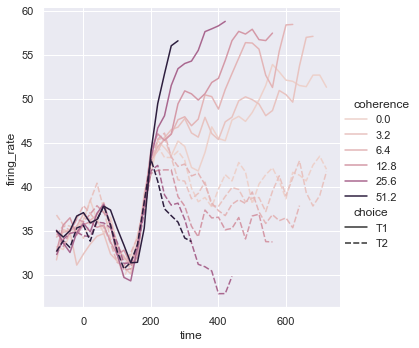

In [53]:
dots = sns.load_dataset("dots").query("align == 'dots'")

sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    hue="coherence", style="choice",
)

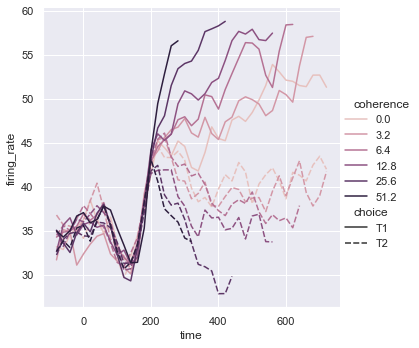

In [56]:
# Pasar una paleta predeterminada, para especificar el numero de colores

palette = sns.cubehelix_palette(light=.8, n_colors=6)
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    hue="coherence", style="choice", palette=palette,
)

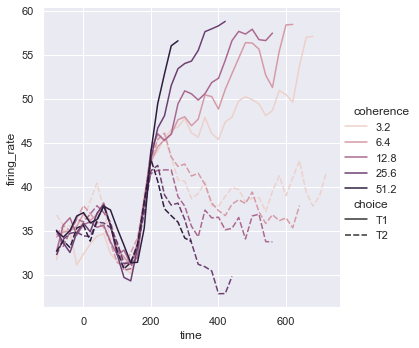

In [57]:
from matplotlib.colors import LogNorm
palette = sns.cubehelix_palette(light=.7, n_colors=6)
sns.relplot(
    data=dots.query("coherence > 0"), kind="line",
    x="time", y="firing_rate",
    hue="coherence", style="choice",
    hue_norm=LogNorm(),
)

### 3.5 Definir el tamaño de la línea

La tercera semántica es **"size" cambia el ancho de las líneas con una variable**

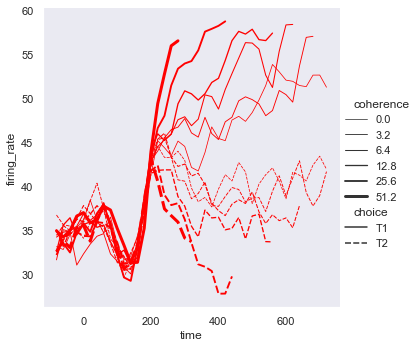

In [61]:
sns.relplot(data=dots, kind="line", x="time", y="firing_rate", 
           size="coherence", style="choice", color="red")

plt.grid(False)

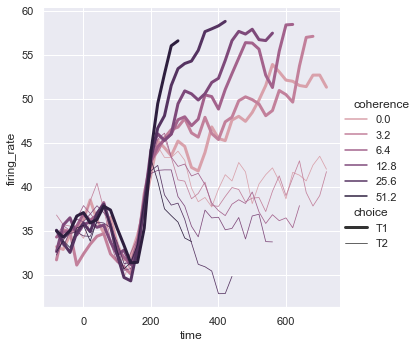

In [62]:
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    hue="coherence", size="choice", palette=palette,
)

### 3.6 Controlar la clasificación y la orientación

Debido a que lineplot() asume que la mayoría de las veces intenta dibujar y como una función de x, el comportamiento predeterminado es ordenar los datos por los valores de x antes de trazar. Sin embargo, esto se puede desactivar.

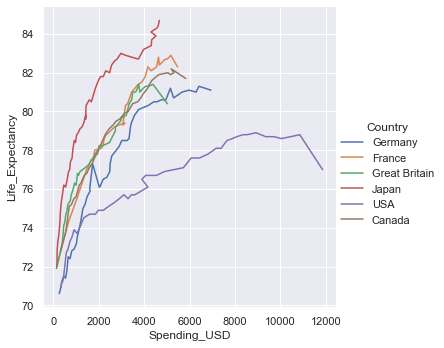

In [64]:
healthexp = sns.load_dataset("healthexp").sort_values("Year")
sns.relplot(
    data=healthexp, kind="line",
    x="Spending_USD", y="Life_Expectancy", hue="Country",
    sort=False
)

## 4. Mostrar múltiples relaciones con facetas - atributo "col"

El mejor enfoque puede ser hacer más de una trama. Debido a que relplot() se basa en FacetGrid, esto es fácil de hacer. Para mostrar la influencia de una variable adicional, en lugar de asignarla a uno de los roles semánticos en la trama, utilícela para "facetar" la visualización. Esto significa que crea varios ejes y traza subconjuntos de los datos en cada uno de ellos.

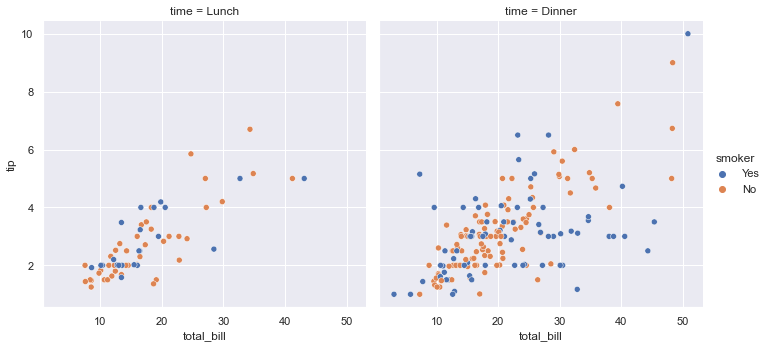

In [65]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip", hue="smoker", col="time",)
                                           ##########

### 4.1 Aplicar facets a filas y columnas (rows and columns) - col= and row=

También puede mostrar la influencia de dos variables de esta manera: **una facetando las columnas y otra facetando las filas**. A medida que comience a agregar más variables a la cuadrícula, es posible que desee disminuir el tamaño de la figura. Recuerde que el tamaño de FacetGrid está parametrizado por la altura y la relación de aspecto de cada faceta.

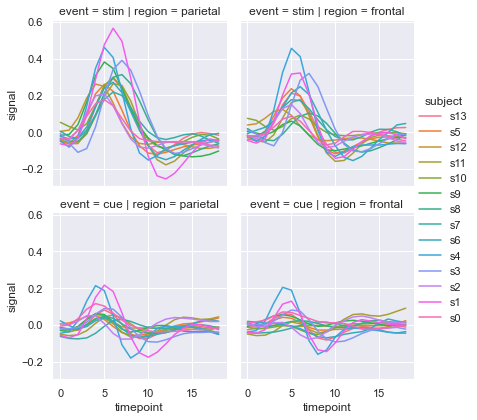

In [66]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="subject",
    col="region", row="event", height=3,
    estimator=None
)

Cuando desee examinar los efectos en muchos niveles de una variable, puede ser una buena idea facetar esa variable en las columnas y luego "envolver" **col_wrap=** las facetas en las filas.

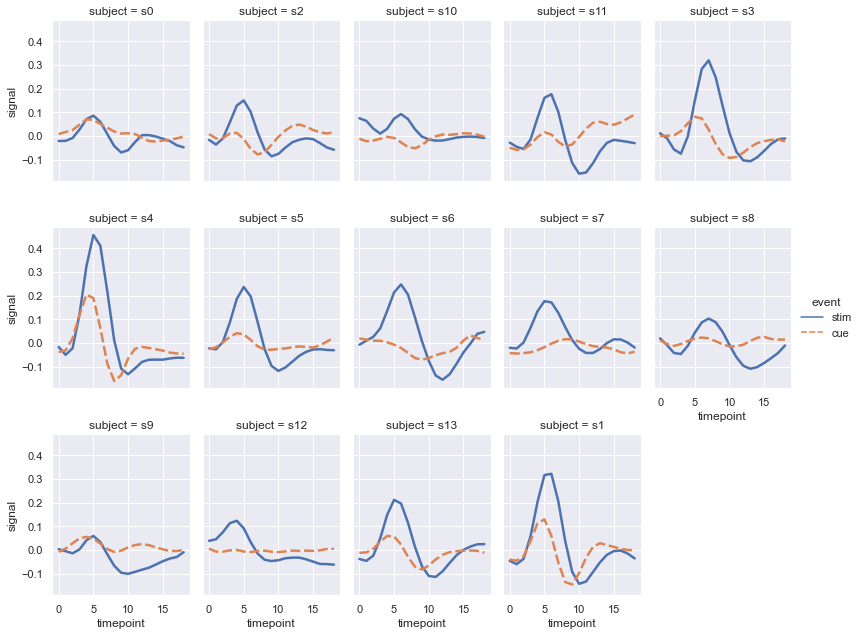

In [67]:
sns.relplot(
    data=fmri.query("region == 'frontal'"), kind="line",
    x="timepoint", y="signal", hue="event", style="event",
    col="subject", col_wrap=5,
    height=3, aspect=.75, linewidth=2.5,
)